<a href="https://colab.research.google.com/github/cmscleberson/dataMining/blob/main/01ColetaDadosCovid02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mineração de Dados - Projeto Final**

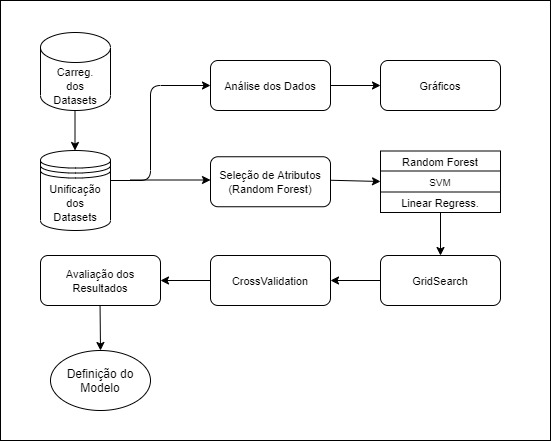

In [ ]:
from unicodedata import normalize

In [ ]:
import pandas as pd

In [ ]:
pd.options.mode.chained_assignment = None

#### Carregamento dos Datasets

In [ ]:
df_munic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets_v1/municipios.csv", encoding='utf-8', sep=',', index_col=[0])

In [ ]:
df_covid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets_v1/covid.csv", encoding='utf-8', sep=';', index_col=False)

In [ ]:
df_medicos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets_v1/medicos.csv", encoding='utf-8', index_col=False)

In [ ]:
df_pibsemesorreg = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets_v1/pibemesor.csv", encoding='latin1', sep=';',  index_col=False)

In [ ]:
df_respirad = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets_v1/respiradores.csv", encoding='utf-8', sep=',', index_col=False)

In [ ]:
df_munic

,estado,municipio,lat,long
0,RO,Alta Floresta D'Oeste,-11.92830,-61.9953
1,RO,Alto Alegre dos Parecis,-12.13200,-61.8350
2,RO,Alto Paraíso,-9.71429,-63.3188
3,RO,Alvorada D'Oeste,-11.34630,-62.2847
4,RO,Ariquemes,-9.90571,-63.0325
...,...,...,...,...
5565,GO,Vianópolis,-16.74050,-48.5159
5566,GO,Vicentinópolis,-17.73220,-49.8047
5567,GO,Vila Boa,-15.03870,-47.0520
5568,GO,Vila Propício,-15.45420,-48.8819


#### Formatação da Coluna "municipios"

##### Eliminação de Acentos

In [ ]:
df_munic['municipio'] = df_munic['municipio'].str.normalize('NFKD').str.encode('ASCII', errors='ignore').str.decode('ASCII')

##### Eliminação de Caracteres Especiais

In [ ]:
df_munic['municipio'] = df_munic['municipio'].str.replace('[-,_]',' ')
df_munic['municipio'] = df_munic['municipio'].str.replace("'",' ')

##### Conversão Para Minúsculas

In [ ]:
df_munic['municipio'] = df_munic['municipio'].str.lower()

In [ ]:
df_munic

,estado,municipio,lat,long
0,RO,alta floresta d oeste,-11.92830,-61.9953
1,RO,alto alegre dos parecis,-12.13200,-61.8350
2,RO,alto paraiso,-9.71429,-63.3188
3,RO,alvorada d oeste,-11.34630,-62.2847
4,RO,ariquemes,-9.90571,-63.0325
...,...,...,...,...
5565,GO,vianopolis,-16.74050,-48.5159
5566,GO,vicentinopolis,-17.73220,-49.8047
5567,GO,vila boa,-15.03870,-47.0520
5568,GO,vila propicio,-15.45420,-48.8819


#### Preparo dos Demais Datasets

##### Redução da Dimensão do Dataset "Covid" - exclusão dos registros que ocorrem simultaneamente 0 casos e 0 óbitos

In [ ]:
df_covid  = df_covid.loc[((df_covid['casos'] != 0) & (df_covid['obitos'] != 0))]

In [ ]:
df_covid

,estado,municipio,data,casos,obitos
108,RO,Alta Floresta D'Oeste,13/07/2020,1,1
124,RO,Alta Floresta D'Oeste,29/07/2020,18,1
131,RO,Alta Floresta D'Oeste,05/08/2020,8,1
139,RO,Alta Floresta D'Oeste,13/08/2020,1,1
144,RO,Alta Floresta D'Oeste,18/08/2020,3,1
...,...,...,...,...,...
1039823,PR,Santo Antônio da Platina,13/08/2020,1,1
1039871,PR,Santo Antônio da Platina,30/09/2020,2,1
1039921,PR,Santo Antônio da Platina,19/11/2020,24,1
1039955,PR,Santo Antônio do Caiuá,23/04/2020,1,1


In [ ]:
df_covid['municipio'] =df_covid['municipio'].str.normalize('NFKD').str.encode('ASCII', errors='ignore').str.decode('ASCII')
df_covid['municipio'] = df_covid['municipio'].str.replace('[-,_]',' ')
df_covid['municipio'] = df_covid['municipio'].str.replace("'",' ')
df_covid['municipio'] = df_covid['municipio'].str.lower()

In [ ]:
df_covid

,estado,municipio,data,casos,obitos
108,RO,alta floresta d oeste,13/07/2020,1,1
124,RO,alta floresta d oeste,29/07/2020,18,1
131,RO,alta floresta d oeste,05/08/2020,8,1
139,RO,alta floresta d oeste,13/08/2020,1,1
144,RO,alta floresta d oeste,18/08/2020,3,1
...,...,...,...,...,...
1039823,PR,santo antonio da platina,13/08/2020,1,1
1039871,PR,santo antonio da platina,30/09/2020,2,1
1039921,PR,santo antonio da platina,19/11/2020,24,1
1039955,PR,santo antonio do caiua,23/04/2020,1,1


##### Concatenando Dois Datasets

In [ ]:
df_covid = pd.merge(df_covid, df_munic, on='municipio', how='inner')


In [ ]:
df_covid

,estado_x,municipio,data,casos,obitos,estado_y,lat,long
0,RO,alta floresta d oeste,13/07/2020,1,1,RO,-11.9283,-61.9953
1,RO,alta floresta d oeste,29/07/2020,18,1,RO,-11.9283,-61.9953
2,RO,alta floresta d oeste,05/08/2020,8,1,RO,-11.9283,-61.9953
3,RO,alta floresta d oeste,13/08/2020,1,1,RO,-11.9283,-61.9953
4,RO,alta floresta d oeste,18/08/2020,3,1,RO,-11.9283,-61.9953
...,...,...,...,...,...,...,...,...
56656,PR,santo antonio da platina,13/08/2020,1,1,PR,-23.2959,-50.0815
56657,PR,santo antonio da platina,30/09/2020,2,1,PR,-23.2959,-50.0815
56658,PR,santo antonio da platina,19/11/2020,24,1,PR,-23.2959,-50.0815
56659,PR,santo antonio do caiua,23/04/2020,1,1,PR,-22.7351,-52.3440


##### Análise da Concatenção (não podem existir coordenadas nulas)

In [ ]:
df_covid.isna().sum()

estado_x     0
municipio    0
data         0
casos        0
obitos       0
estado_y     0
lat          0
long         0
dtype: int64

##### Eliminação dos Valores Nulos

In [ ]:
df_covid.dropna(axis=0, inplace=True)

In [ ]:
df_covid.isna().sum()

estado_x     0
municipio    0
data         0
casos        0
obitos       0
estado_y     0
lat          0
long         0
dtype: int64

##### Padronização dos Nomes das Colunas

In [ ]:
df_covid.drop(['estado_y'], axis=1, inplace=True)

In [ ]:
df_covid.rename(columns={'estado_x':'estado'}, inplace=True)

##### Padronização de Tipos de Dados


In [ ]:
df_covid['casos'] = df_covid['casos'].astype(int)

In [ ]:
df_covid['obitos'] = df_covid['obitos'].astype(int)

In [ ]:
df_covid

,estado,municipio,data,casos,obitos,lat,long
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953
...,...,...,...,...,...,...,...
56656,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815
56657,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815
56658,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815
56659,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440


In [ ]:
df_medicos

,OBJECTID,Codigo_Municipio,Nome_municipio,Nome_Estado,GR,Pop_Total,Total_Medicos,Medicos_SUS,Medicos_100mil_hab_Ind,Medicos_SUS_100mil_hab_Ind,Shape__Area,Shape__Length,P_Medicos_SUS
0,1,5200050,Abadia de Goiás,Goiás,Centro-Oeste,8773,16,16,182.377750,182.377750,0.012482,0.591110,100.000000
1,2,3100104,Abadia dos Dourados,Minas Gerais,Sudeste,6989,14,14,200.314780,200.314780,0.075314,1.959124,100.000000
2,3,5200100,Abadiânia,Goiás,Centro-Oeste,20042,16,16,79.832352,79.832352,0.088320,1.811350,100.000000
3,4,3100203,Abaeté,Minas Gerais,Sudeste,23237,51,48,219.477557,206.567113,0.155999,2.434613,94.117647
4,5,1500107,Abaetetuba,Pará,Norte,157698,90,82,57.071111,51.998123,0.130889,1.829539,91.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5566,2933604,Xique-Xique,Bahia,Nordeste,46483,12,12,25.815890,25.815890,0.420182,4.805814,100.000000
5566,5567,2517407,Zabelê,Paraíba,Nordeste,2240,1,1,44.642857,44.642857,0.008974,0.444401,100.000000
5567,5568,3557154,Zacarias,São Paulo,Sudeste,2718,0,0,0.000000,0.000000,0.027740,0.773112,0.000000
5568,5569,2114007,Zé Doca,Maranhão,Nordeste,51714,13,13,25.138260,25.138260,0.174139,3.058613,100.000000


In [ ]:
siglas=["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"]



In [ ]:
nomesEstados = ["Acre","Alagoas","Amapá","Amazonas","Bahia","Ceará","Distrito Federal","Espírito Santo","Goiás","Maranhão","Mato Grosso","Mato Grosso do Sul","Minas Gerais","Pará","Paraíba","Paraná","Pernambuco","Piauí","Rio de Janeiro","Rio Grande do Norte","Rio Grande do Sul","Rondônia","Roraima","Santa Catarina","São Paulo","Sergipe","Tocantins"]


In [ ]:
lista = []

In [ ]:
for i in df_medicos['Nome_Estado'].values:
  for j in range(len(nomesEstados)):
    if i == nomesEstados[j]:
      lista.append(siglas[j])
  



In [ ]:
df_medicos['estado'] = [i for i in lista]

In [ ]:
df_medicos.rename(columns={'Nome_municipio':'municipio','Medicos_100mil_hab_Ind':'medicosCemMil'},inplace=True)

In [ ]:
df_medicos = df_medicos[['municipio','medicosCemMil','estado']]

In [ ]:
df_medicos

,municipio,medicosCemMil,estado
0,Abadia de Goiás,182.377750,GO
1,Abadia dos Dourados,200.314780,MG
2,Abadiânia,79.832352,GO
3,Abaeté,219.477557,MG
4,Abaetetuba,57.071111,PA
...,...,...,...
5565,Xique-Xique,25.815890,BA
5566,Zabelê,44.642857,PB
5567,Zacarias,0.000000,SP
5568,Zé Doca,25.138260,MA


In [ ]:
df_medicos['municipio'] = df_medicos['municipio'].str.normalize('NFKD').str.encode('ASCII', errors='ignore').str.decode('ASCII')
df_medicos['municipio'] = df_medicos['municipio'].str.replace('[-,_]',' ')
df_medicos['municipio'] = df_medicos['municipio'].str.replace("'",' ')
df_medicos['municipio'] = df_medicos['municipio'].str.lower()

In [ ]:
df_medicos

,municipio,medicosCemMil,estado
0,abadia de goias,182.377750,GO
1,abadia dos dourados,200.314780,MG
2,abadiania,79.832352,GO
3,abaete,219.477557,MG
4,abaetetuba,57.071111,PA
...,...,...,...
5565,xique xique,25.815890,BA
5566,zabele,44.642857,PB
5567,zacarias,0.000000,SP
5568,ze doca,25.138260,MA


In [ ]:
df_covid = pd.merge(df_covid, df_medicos,on='municipio', how='inner')

In [ ]:
df_covid

,estado_x,municipio,data,casos,obitos,lat,long,medicosCemMil,estado_y
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953,91.523208,RO
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953,91.523208,RO
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953,91.523208,RO
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953,91.523208,RO
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953,91.523208,RO
...,...,...,...,...,...,...,...,...,...
71297,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815,143.500098,PR
71298,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815,143.500098,PR
71299,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815,143.500098,PR
71300,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440,0.000000,PR


In [ ]:
df_covid['medicosCemMil'].isna().sum()

0

In [ ]:
df_covid.isna().sum()

estado_x         0
municipio        0
data             0
casos            0
obitos           0
lat              0
long             0
medicosCemMil    0
estado_y         0
dtype: int64

In [ ]:
df_covid.dropna(inplace=True)

In [ ]:
df_covid

,estado_x,municipio,data,casos,obitos,lat,long,medicosCemMil,estado_y
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953,91.523208,RO
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953,91.523208,RO
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953,91.523208,RO
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953,91.523208,RO
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953,91.523208,RO
...,...,...,...,...,...,...,...,...,...
71297,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815,143.500098,PR
71298,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815,143.500098,PR
71299,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815,143.500098,PR
71300,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440,0.000000,PR


In [ ]:
df_covid.drop('estado_y', axis=1, inplace=True)

In [ ]:
df_covid.rename(columns={'estado_x':'estado'}, inplace=True)

In [ ]:
df_covid.dropna(inplace=True)

In [ ]:
df_covid

,estado,municipio,data,casos,obitos,lat,long,medicosCemMil
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953,91.523208
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953,91.523208
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953,91.523208
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953,91.523208
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953,91.523208
...,...,...,...,...,...,...,...,...
71297,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815,143.500098
71298,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815,143.500098
71299,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815,143.500098
71300,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440,0.000000


In [ ]:
df_pibsemesorreg

,ord,regiaopais,estado,municipio,mesorregiao,pib
0,1,Norte,RO,Alta Floresta D'Oeste,Leste Rondoniense,"19611,75"
1,2,Norte,RO,Ariquemes,Leste Rondoniense,"21389,67"
2,3,Norte,RO,Cabixi,Leste Rondoniense,"22315,8"
3,4,Norte,RO,Cacoal,Leste Rondoniense,"24037,91"
4,5,Norte,RO,Cerejeiras,Leste Rondoniense,"25009,71"
...,...,...,...,...,...,...
5565,5566,Centro-oeste,GO,Vianópolis,Sul Goiano,"28942,36"
5566,5567,Centro-oeste,GO,Vicentinópolis,Sul Goiano,"41772,71"
5567,5568,Centro-oeste,GO,Vila Boa,Leste Goiano,"23992,38"
5568,5569,Centro-oeste,GO,Vila Propício,Leste Goiano,"32016,61"


In [ ]:
df_pibsemesorreg.drop('ord', axis =1,inplace=True)

In [ ]:
df_pibsemesorreg['municipio'] = df_pibsemesorreg['municipio'].str.normalize('NFKD').str.encode('ASCII', errors='ignore').str.decode('ASCII')
df_pibsemesorreg['municipio'] = df_pibsemesorreg['municipio'].str.replace('[-,_]',' ')
df_pibsemesorreg['municipio'] = df_pibsemesorreg['municipio'].str.replace("'",' ')
df_pibsemesorreg['municipio'] = df_pibsemesorreg['municipio'].str.lower()

In [ ]:
df_pibsemesorreg

,regiaopais,estado,municipio,mesorregiao,pib
0,Norte,RO,alta floresta d oeste,Leste Rondoniense,"19611,75"
1,Norte,RO,ariquemes,Leste Rondoniense,"21389,67"
2,Norte,RO,cabixi,Leste Rondoniense,"22315,8"
3,Norte,RO,cacoal,Leste Rondoniense,"24037,91"
4,Norte,RO,cerejeiras,Leste Rondoniense,"25009,71"
...,...,...,...,...,...
5565,Centro-oeste,GO,vianopolis,Sul Goiano,"28942,36"
5566,Centro-oeste,GO,vicentinopolis,Sul Goiano,"41772,71"
5567,Centro-oeste,GO,vila boa,Leste Goiano,"23992,38"
5568,Centro-oeste,GO,vila propicio,Leste Goiano,"32016,61"


In [ ]:
df_covid = pd.merge(df_covid, df_pibsemesorreg,on='municipio', how='inner')

In [ ]:
df_covid

,estado_x,municipio,data,casos,obitos,lat,long,medicosCemMil,regiaopais,estado_y,mesorregiao,pib
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953,91.523208,Norte,RO,Leste Rondoniense,"19611,75"
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953,91.523208,Norte,RO,Leste Rondoniense,"19611,75"
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953,91.523208,Norte,RO,Leste Rondoniense,"19611,75"
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953,91.523208,Norte,RO,Leste Rondoniense,"19611,75"
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953,91.523208,Norte,RO,Leste Rondoniense,"19611,75"
...,...,...,...,...,...,...,...,...,...,...,...,...
110797,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815,143.500098,Sul,PR,Norte Pioneiro Paranaense,"24910,49"
110798,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815,143.500098,Sul,PR,Norte Pioneiro Paranaense,"24910,49"
110799,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815,143.500098,Sul,PR,Norte Pioneiro Paranaense,"24910,49"
110800,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440,0.000000,Sul,PR,Noroeste Paranaense,"19129,99"


In [ ]:
df_covid.isna().sum()

estado_x         0
municipio        0
data             0
casos            0
obitos           0
lat              0
long             0
medicosCemMil    0
regiaopais       0
estado_y         0
mesorregiao      0
pib              0
dtype: int64

In [ ]:
df_covid.rename(columns={'estado_x':'estado'}, inplace=True)

In [ ]:
df_covid.drop('estado_y', inplace=True, axis=1)

In [ ]:
df_covid

,estado,municipio,data,casos,obitos,lat,long,medicosCemMil,regiaopais,mesorregiao,pib
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75"
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75"
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75"
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75"
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75"
...,...,...,...,...,...,...,...,...,...,...,...
110797,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815,143.500098,Sul,Norte Pioneiro Paranaense,"24910,49"
110798,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815,143.500098,Sul,Norte Pioneiro Paranaense,"24910,49"
110799,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815,143.500098,Sul,Norte Pioneiro Paranaense,"24910,49"
110800,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440,0.000000,Sul,Noroeste Paranaense,"19129,99"


In [ ]:
df_respirad

,OBJECTID,Codigo_Municipio,Nome_municipio,Pop_Total,Total_Respiradores,Respiradores_100mil_hab_Ind,Respiradores_SUS_100mil_hab_Ind,Total_SUS_Respiradores,Shape__Area,Shape__Length,P_Respiradores_SUS
0,1,5200050,Abadia de Goiás,8773,0,0.000000,0.000000,0,0.012482,0.591110,0.0
1,2,3100104,Abadia dos Dourados,6989,0,0.000000,0.000000,0,0.075314,1.959124,0.0
2,3,5200100,Abadiânia,20042,0,0.000000,0.000000,0,0.088320,1.811350,0.0
3,4,3100203,Abaeté,23237,2,8.606963,8.606963,2,0.155999,2.434613,100.0
4,5,1500107,Abaetetuba,157698,10,6.341235,5.707111,9,0.130889,1.829539,90.0
...,...,...,...,...,...,...,...,...,...,...,...
5565,5566,2933604,Xique-Xique,46483,1,2.151324,2.151324,1,0.420182,4.805814,100.0
5566,5567,2517407,Zabelê,2240,0,0.000000,0.000000,0,0.008974,0.444401,0.0
5567,5568,3557154,Zacarias,2718,0,0.000000,0.000000,0,0.027740,0.773112,0.0
5568,5569,2114007,Zé Doca,51714,1,1.933712,1.933712,1,0.174139,3.058613,100.0


In [ ]:
df_respirad['Nome_municipio'] = df_respirad['Nome_municipio'].str.normalize('NFKD').str.encode('ASCII', errors='ignore').str.decode('ASCII')
df_respirad['Nome_municipio'] = df_respirad['Nome_municipio'].str.replace('[-,_]',' ')
df_respirad['Nome_municipio'] = df_respirad['Nome_municipio'].str.replace("'",' ')
df_respirad['Nome_municipio'] = df_respirad['Nome_municipio'].str.lower()

In [ ]:
df_respirad = df_respirad[['Nome_municipio','Respiradores_100mil_hab_Ind']]

In [ ]:
df_respirad

,Nome_municipio,Respiradores_100mil_hab_Ind
0,abadia de goias,0.000000
1,abadia dos dourados,0.000000
2,abadiania,0.000000
3,abaete,8.606963
4,abaetetuba,6.341235
...,...,...
5565,xique xique,2.151324
5566,zabele,0.000000
5567,zacarias,0.000000
5568,ze doca,1.933712


In [ ]:
df_respirad.rename(columns={'Nome_municipio':'municipio', 'Respiradores_100mil_hab_Ind':'respiradCemMil' }, inplace=True)

In [ ]:
df_respirad

,municipio,respiradCemMil
0,abadia de goias,0.000000
1,abadia dos dourados,0.000000
2,abadiania,0.000000
3,abaete,8.606963
4,abaetetuba,6.341235
...,...,...
5565,xique xique,2.151324
5566,zabele,0.000000
5567,zacarias,0.000000
5568,ze doca,1.933712


In [ ]:
df_respirad['respiradCemMil'] =  df_respirad['respiradCemMil'].astype(int)

In [ ]:
df_respirad

,municipio,respiradCemMil
0,abadia de goias,0
1,abadia dos dourados,0
2,abadiania,0
3,abaete,8
4,abaetetuba,6
...,...,...
5565,xique xique,2
5566,zabele,0
5567,zacarias,0
5568,ze doca,1


In [ ]:
df_covid = pd.merge(df_covid, df_respirad,on='municipio', how='inner')

In [ ]:
df_covid

,estado,municipio,data,casos,obitos,lat,long,medicosCemMil,regiaopais,mesorregiao,pib,respiradCemMil
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75",0
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75",0
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75",0
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75",0
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953,91.523208,Norte,Leste Rondoniense,"19611,75",0
...,...,...,...,...,...,...,...,...,...,...,...,...
229133,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815,143.500098,Sul,Norte Pioneiro Paranaense,"24910,49",17
229134,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815,143.500098,Sul,Norte Pioneiro Paranaense,"24910,49",17
229135,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815,143.500098,Sul,Norte Pioneiro Paranaense,"24910,49",17
229136,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440,0.000000,Sul,Noroeste Paranaense,"19129,99",0


In [ ]:
df_covid['medicosCemMil'] = df_covid['medicosCemMil'].astype(float).round(2)

In [ ]:
df_covid

,estado,municipio,data,casos,obitos,lat,long,medicosCemMil,regiaopais,mesorregiao,pib,respiradCemMil
0,RO,alta floresta d oeste,13/07/2020,1,1,-11.9283,-61.9953,91.52,Norte,Leste Rondoniense,"19611,75",0
1,RO,alta floresta d oeste,29/07/2020,18,1,-11.9283,-61.9953,91.52,Norte,Leste Rondoniense,"19611,75",0
2,RO,alta floresta d oeste,05/08/2020,8,1,-11.9283,-61.9953,91.52,Norte,Leste Rondoniense,"19611,75",0
3,RO,alta floresta d oeste,13/08/2020,1,1,-11.9283,-61.9953,91.52,Norte,Leste Rondoniense,"19611,75",0
4,RO,alta floresta d oeste,18/08/2020,3,1,-11.9283,-61.9953,91.52,Norte,Leste Rondoniense,"19611,75",0
...,...,...,...,...,...,...,...,...,...,...,...,...
229133,PR,santo antonio da platina,13/08/2020,1,1,-23.2959,-50.0815,143.50,Sul,Norte Pioneiro Paranaense,"24910,49",17
229134,PR,santo antonio da platina,30/09/2020,2,1,-23.2959,-50.0815,143.50,Sul,Norte Pioneiro Paranaense,"24910,49",17
229135,PR,santo antonio da platina,19/11/2020,24,1,-23.2959,-50.0815,143.50,Sul,Norte Pioneiro Paranaense,"24910,49",17
229136,PR,santo antonio do caiua,23/04/2020,1,1,-22.7351,-52.3440,0.00,Sul,Noroeste Paranaense,"19129,99",0


In [ ]:
df_covid.to_csv('/content/drive/MyDrive/Colab Notebooks/covidFinal.csv')